In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import csv

In [12]:
with open('GroceryStoreDataSet.csv', 'r') as f:
    reader = csv.reader(f)
    dataset = list(reader)

print(dataset)

[['MILK', 'BREAD', 'BISCUIT'], ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'], ['BREAD', 'TEA', 'BOURNVITA'], ['JAM', 'MAGGI', 'BREAD', 'MILK'], ['MAGGI', 'TEA', 'BISCUIT'], ['BREAD', 'TEA', 'BOURNVITA'], ['MAGGI', 'TEA', 'CORNFLAKES'], ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'], ['JAM', 'MAGGI', 'BREAD', 'TEA'], ['BREAD', 'MILK'], ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'], ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'], ['COFFEE', 'SUGER', 'BOURNVITA'], ['BREAD', 'COFFEE', 'COCK'], ['BREAD', 'SUGER', 'BISCUIT'], ['COFFEE', 'SUGER', 'CORNFLAKES'], ['BREAD', 'SUGER', 'BOURNVITA'], ['BREAD', 'COFFEE', 'SUGER'], ['BREAD', 'COFFEE', 'SUGER'], ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]


In [13]:
encoder = TransactionEncoder()
encoded_data = encoder.fit(dataset).transform(dataset) 

df_encoded = pd.DataFrame(encoded_data, columns=encoder.columns_)
df_encoded.head()

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True


In [14]:
df_encoded = df_encoded.astype(int)
df_encoded.head()

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,1,1,0,0
4,1,0,0,0,0,0,0,1,0,0,1


C:\Users\bwojt\AppData\Local\Temp\ipykernel_22164\386141622.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_freq.values, y=item_freq.index, palette='viridis')


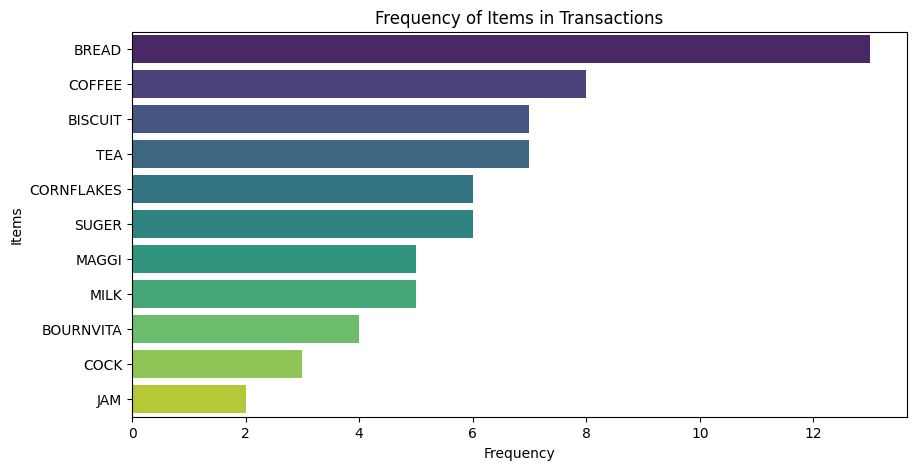

In [15]:
pd.api.types.is_categorical_dtype

# Summing up the columns to get the frequency of each item
item_freq = df_encoded.sum().sort_values(ascending=False)

# Setting up the figure size for better visualization
plt.figure(figsize=(10, 5))

# Creating a bar chart
sns.barplot(x=item_freq.values, y=item_freq.index, palette='viridis')

# Adding title and labels to the axes
plt.title('Frequency of Items in Transactions')
plt.xlabel('Frequency')
plt.ylabel('Items')
plt.show()

In [16]:
df = apriori(df_encoded, min_support = 0.15, use_colnames = True, verbose = 1)

df = df.sort_values(by="support", ascending = False)
print(df)

Processing 117 combinations | Sampling itemset size 3
    support               itemsets
2      0.65                (BREAD)
4      0.40               (COFFEE)
0      0.35              (BISCUIT)
9      0.35                  (TEA)
5      0.30           (CORNFLAKES)
8      0.30                (SUGER)
6      0.25                (MAGGI)
7      0.25                 (MILK)
15     0.20          (MILK, BREAD)
20     0.20        (COFFEE, SUGER)
19     0.20   (COFFEE, CORNFLAKES)
17     0.20           (BREAD, TEA)
16     0.20         (BREAD, SUGER)
21     0.20           (MAGGI, TEA)
1      0.20            (BOURNVITA)
10     0.20       (BREAD, BISCUIT)
14     0.15         (BREAD, MAGGI)
13     0.15        (BREAD, COFFEE)
12     0.15     (BREAD, BOURNVITA)
18     0.15         (COCK, COFFEE)
3      0.15                 (COCK)
11     0.15  (CORNFLAKES, BISCUIT)


C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [17]:
df_ar = association_rules(df, metric = "confidence", min_threshold = 0.6)
print(df_ar)

    antecedents consequents  antecedent support  consequent support  support  \
0        (MILK)     (BREAD)                0.25                0.65     0.20   
1       (SUGER)    (COFFEE)                0.30                0.40     0.20   
2  (CORNFLAKES)    (COFFEE)                0.30                0.40     0.20   
3       (SUGER)     (BREAD)                0.30                0.65     0.20   
4       (MAGGI)       (TEA)                0.25                0.35     0.20   
5       (MAGGI)     (BREAD)                0.25                0.65     0.15   
6   (BOURNVITA)     (BREAD)                0.20                0.65     0.15   
7        (COCK)    (COFFEE)                0.15                0.40     0.15   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.800000  1.230769    0.0375       1.750       0.250000  
1    0.666667  1.666667    0.0800       1.800       0.571429  
2    0.666667  1.666667    0.0800       1.800       0.571429  
3    0.666667  1.025641    

In [18]:
df_ar = df_ar.sort_values(by="support", ascending = False)
print(df_ar)

    antecedents consequents  antecedent support  consequent support  support  \
0        (MILK)     (BREAD)                0.25                0.65     0.20   
1       (SUGER)    (COFFEE)                0.30                0.40     0.20   
2  (CORNFLAKES)    (COFFEE)                0.30                0.40     0.20   
3       (SUGER)     (BREAD)                0.30                0.65     0.20   
4       (MAGGI)       (TEA)                0.25                0.35     0.20   
5       (MAGGI)     (BREAD)                0.25                0.65     0.15   
6   (BOURNVITA)     (BREAD)                0.20                0.65     0.15   
7        (COCK)    (COFFEE)                0.15                0.40     0.15   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.800000  1.230769    0.0375       1.750       0.250000  
1    0.666667  1.666667    0.0800       1.800       0.571429  
2    0.666667  1.666667    0.0800       1.800       0.571429  
3    0.666667  1.025641    

In [19]:
df_ar = df_ar.sort_values(by='confidence', ascending=False)
print(df_ar)

    antecedents consequents  antecedent support  consequent support  support  \
7        (COCK)    (COFFEE)                0.15                0.40     0.15   
0        (MILK)     (BREAD)                0.25                0.65     0.20   
4       (MAGGI)       (TEA)                0.25                0.35     0.20   
6   (BOURNVITA)     (BREAD)                0.20                0.65     0.15   
1       (SUGER)    (COFFEE)                0.30                0.40     0.20   
2  (CORNFLAKES)    (COFFEE)                0.30                0.40     0.20   
3       (SUGER)     (BREAD)                0.30                0.65     0.20   
5       (MAGGI)     (BREAD)                0.25                0.65     0.15   

   confidence      lift  leverage  conviction  zhangs_metric  
7    1.000000  2.500000    0.0900         inf       0.705882  
0    0.800000  1.230769    0.0375       1.750       0.250000  
4    0.800000  2.285714    0.1125       3.250       0.750000  
6    0.750000  1.153846    

In [20]:
df_ar = df_ar.sort_values(by='lift', ascending=False)
print(df_ar)

    antecedents consequents  antecedent support  consequent support  support  \
7        (COCK)    (COFFEE)                0.15                0.40     0.15   
4       (MAGGI)       (TEA)                0.25                0.35     0.20   
1       (SUGER)    (COFFEE)                0.30                0.40     0.20   
2  (CORNFLAKES)    (COFFEE)                0.30                0.40     0.20   
0        (MILK)     (BREAD)                0.25                0.65     0.20   
6   (BOURNVITA)     (BREAD)                0.20                0.65     0.15   
3       (SUGER)     (BREAD)                0.30                0.65     0.20   
5       (MAGGI)     (BREAD)                0.25                0.65     0.15   

   confidence      lift  leverage  conviction  zhangs_metric  
7    1.000000  2.500000    0.0900         inf       0.705882  
4    0.800000  2.285714    0.1125       3.250       0.750000  
1    0.666667  1.666667    0.0800       1.800       0.571429  
2    0.666667  1.666667    